<a href="https://colab.research.google.com/github/ArjunVerma/Fashion-Image-Recognition/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Importing dataset
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# Names in the order in which labels are mapped to the numbers
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

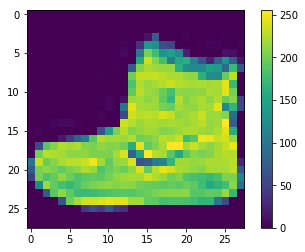

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

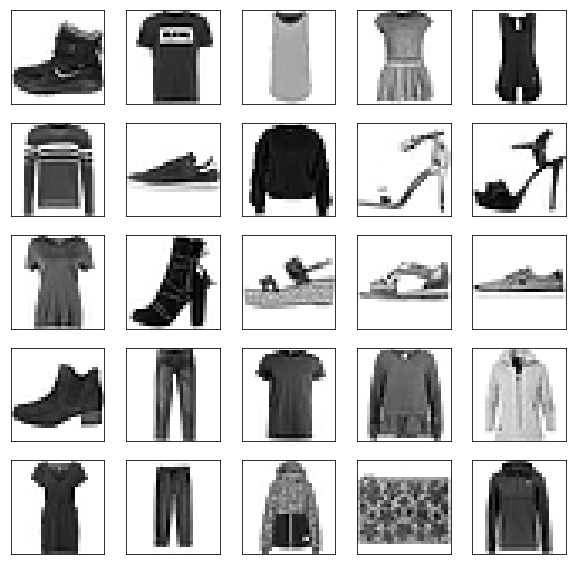

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]]).set_color('white')
plt.show()

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(10, activation= tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer= 'adam',
               loss= 'sparse_categorical_crossentropy',
               metrics= ['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs= 5)

Epoch 1/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4952 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3713 - acc: 0.8647
Epoch 3/5
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3335 - acc: 0.8786
Epoch 4/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3098 - acc: 0.8865
Epoch 5/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2919 - acc: 0.8920


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy : ', test_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3635 - acc: 0.8714
Test accuracy :  0.8714


In [0]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([1.3486250e-06, 2.9007560e-07, 1.3125473e-06, 1.8151175e-08,
       1.6139358e-06, 2.2469638e-02, 2.2275033e-06, 5.6563135e-02,
       1.5014026e-04, 9.2081022e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9